<a href="https://colab.research.google.com/github/shaikasifthanveer/sk_asif_thanveer/blob/main/Crypto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas scikit-learn matplotlib


In [2]:
import pandas as pd

df = pd.read_csv('combined_crypto_historical_data.csv')

df.head()



,timestamp,open,high,low,close,volume,name,symbol
0,2024-09-23 23:59:59.999,588.086941,615.720623,585.507652,604.366027,2189508231.1,2781,BNB
1,2024-09-24 23:59:59.999,604.366027,612.607626,600.267617,606.523068,1904808937.09,2781,BNB
2,2024-09-25 23:59:59.999,606.523068,607.762932,584.858847,587.352531,1744393945.96,2781,BNB
3,2024-09-26 23:59:59.999,587.351361,608.854169,581.228306,596.776939,2081857125.95,2781,BNB
4,2024-09-27 23:59:59.999,596.776939,614.473508,596.501005,607.866992,2144197609.3,2781,BNB


In [3]:

df['timestamp'] = pd.to_datetime(df['timestamp'])


crypto = 'BNB'
df = df[df['symbol'] == crypto].sort_values('timestamp')


for lag in range(1, 4):
    df[f'close_lag_{lag}'] = df['close'].shift(lag)


df['close_roll_mean_3'] = df['close'].rolling(window=3).mean()
df['close_roll_mean_7'] = df['close'].rolling(window=7).mean()


df = df.dropna()

df.head()


,timestamp,open,high,low,close,volume,name,symbol,close_lag_1,close_lag_2,close_lag_3,close_roll_mean_3,close_roll_mean_7
6,2024-09-29 23:59:59.999,601.567174,602.660376,593.049242,596.411177,1649655134.28,2781,BNB,601.567174,607.866992,596.776939,601.948447,600.123415
7,2024-09-30 23:59:59.999,596.411177,596.441440,564.653294,567.260092,1978021597.7,2781,BNB,596.411177,601.567174,607.866992,588.412814,594.822567
8,2024-10-01 23:59:59.999,567.260092,582.434771,538.479625,547.997142,2124076271.58,2781,BNB,567.260092,596.411177,601.567174,570.556137,586.461721
9,2024-10-02 23:59:59.999,547.997142,557.998664,536.153304,542.712315,1821113447.54,2781,BNB,547.997142,567.260092,596.411177,552.656516,580.084547
10,2024-10-03 23:59:59.999,542.712315,550.507586,535.380615,544.424976,1611934612.09,2781,BNB,542.712315,547.997142,567.260092,545.044811,572.605695


In [4]:

feature_cols = ['close_lag_1', 'close_lag_2', 'close_lag_3', 'close_roll_mean_3', 'close_roll_mean_7']
X = df[feature_cols]
y = df['close']


In [5]:
train_size = int(len(df) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [6]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [7]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred = rf.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f'MAE: {mae}')
print(f'MSE: {mse}')


MAE: 173.69747469471787
MSE: 49784.82845403722


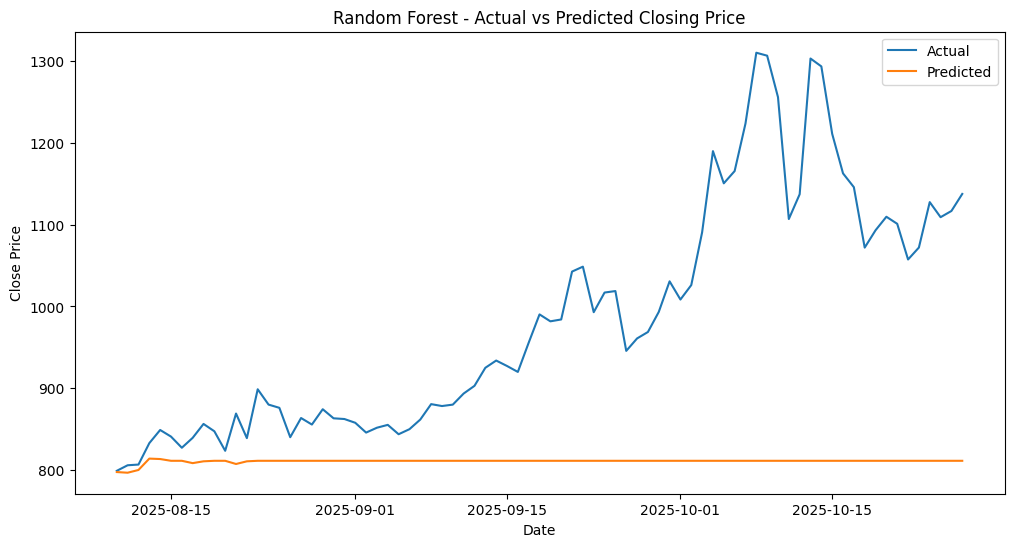

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'][train_size:], y_test, label='Actual')
plt.plot(df['timestamp'][train_size:], y_pred, label='Predicted')
plt.title('Random Forest - Actual vs Predicted Closing Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


In [9]:
importances = rf.feature_importances_
for feat, imp in zip(feature_cols, importances):
    print(f"{feat}: {imp:.4f}")


close_lag_1: 0.0323
close_lag_2: 0.0104
close_lag_3: 0.0059
close_roll_mean_3: 0.9446
close_roll_mean_7: 0.0066
